In [27]:
# Tutorial 1

import pandas as pd

In [28]:
pd.set_option('display.max_rows', None) 
dataset = pd.read_csv(r'C:\Users\mtsil\OneDrive\Documents\fuel.csv')  
dataset.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,NaN,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,NaN,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,NaN,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,NaN,9.5,11.0,258
3,NaN,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,NaN,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


In [29]:
dataset.isnull().sum()

Model-Year               1036
Make                        0
Model                       0
Vehicle-Class               0
Engine-Size                 0
Cylinders                   0
Transmission                0
Fuel-Type                   0
Fuel-Consumption-City      15
Fuel-Consumption-Hwy        0
Fuel-Consumption-Comb      15
CO2-Emissions               0
dtype: int64

In [30]:
dataset['Engine-Size'].isnull().sum()

0

In [31]:
dataset['CO2-Emissions'].isnull().sum()

0

In [32]:
# Tutorial 2 (without having done any kind of data transformation or scaling or outlier removal)

X = dataset[['Engine-Size']]
y = dataset['CO2-Emissions']


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [35]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  138.08438245419183
Coefficient:  [36.25458314]


In [37]:
y_pred_model= model.predict(X_test)

In [38]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
399,329,293.979090
329,296,264.975423
124,204,188.840799
678,178,210.593549
216,314,330.233673


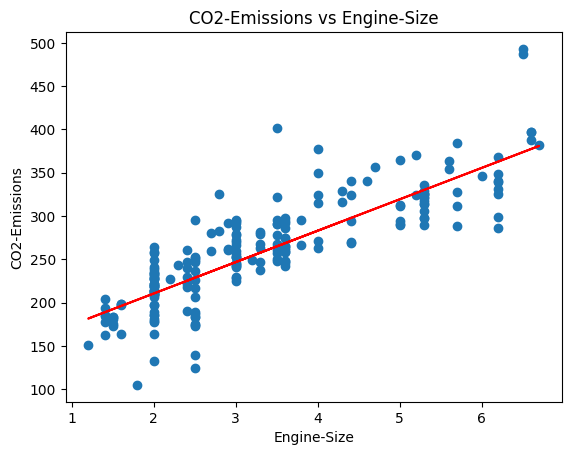

In [39]:
import matplotlib.pyplot as plt
plt.xlabel('Engine-Size')
plt.ylabel('CO2-Emissions')
plt.title('CO2-Emissions vs Engine-Size')
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_model, 'Red')
plt.show()


In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.7076855591789908


In [41]:
# Tutorial 3 (with log transformation)

dataset.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Model-Year,10.0,2019.00,0.00,2019.0,2019.00,2019.0,2019.0,2019.0
Engine-Size,1046.0,3.11,1.32,1.0,2.00,3.0,3.6,8.0
Cylinders,1046.0,5.60,1.80,3.0,4.00,6.0,6.0,16.0
Fuel-Consumption-City,1031.0,12.37,3.29,4.2,10.20,12.0,14.3,26.8
Fuel-Consumption-Hwy,1046.0,9.04,2.05,4.0,7.60,8.8,10.2,17.2
Fuel-Consumption-Comb,1031.0,10.88,2.71,4.1,9.10,10.6,12.6,22.2
CO2-Emissions,1046.0,251.31,57.02,96.0,212.25,248.0,289.0,522.0


<Axes: >

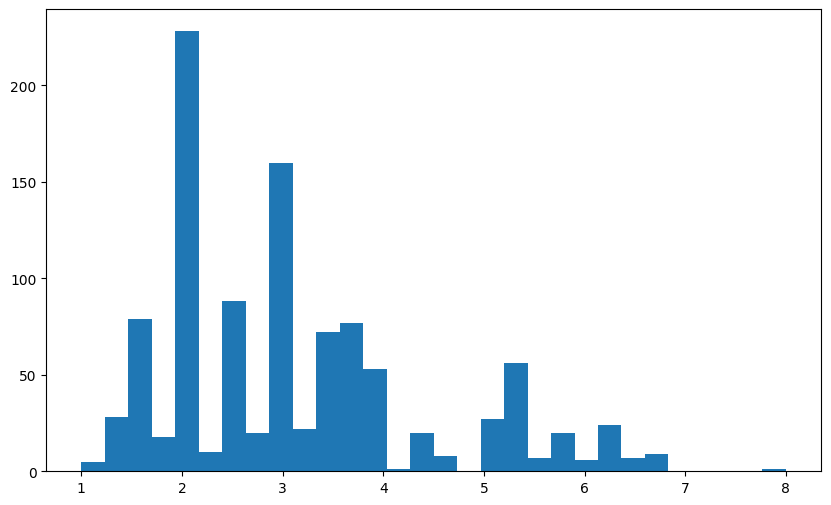

In [42]:
dataset['Engine-Size'].hist(grid=False,
       figsize=(10, 6),
       bins=30)

<Axes: >

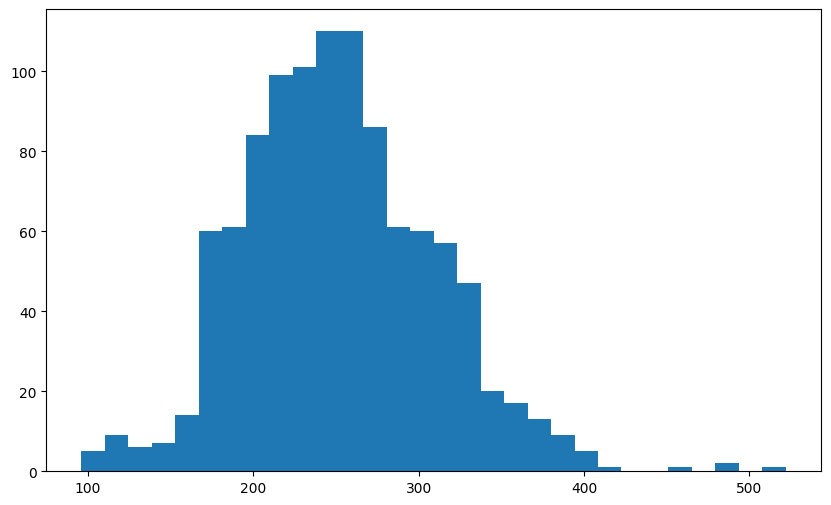

In [43]:
dataset['CO2-Emissions'].hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [44]:
new_df = dataset[['Engine-Size', 'CO2-Emissions']]
new_df.head()

,Engine-Size,CO2-Emissions
0,2.4,199
1,3.5,252
2,3.5,258
3,3.0,210
4,3.5,261


In [45]:
import numpy as np
new_df[["Engine-Size", "CO2-Emissions"]] = pd.DataFrame(
    np.log(new_df[["Engine-Size", "CO2-Emissions"]]), columns=["Engine-Size", "CO2-Emissions"]
)

C:\Users\mtsil\AppData\Local\Temp\ipykernel_22648\3598002890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[["Engine-Size", "CO2-Emissions"]] = pd.DataFrame(


In [46]:
new_df.head()

,Engine-Size,CO2-Emissions
0,0.875469,5.293305
1,1.252763,5.529429
2,1.252763,5.552960
3,1.098612,5.347108
4,1.252763,5.564520


In [47]:
X = new_df[['Engine-Size']]
y = new_df['CO2-Emissions']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [49]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [50]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  5.008294980050874
Coefficient:  [0.46707116]


In [51]:
y_pred_model= model.predict(X_test)

In [52]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
399,5.796058,5.689572
329,5.690359,5.593424
124,5.318120,5.165451
678,5.181784,5.332044
216,5.749393,5.787233


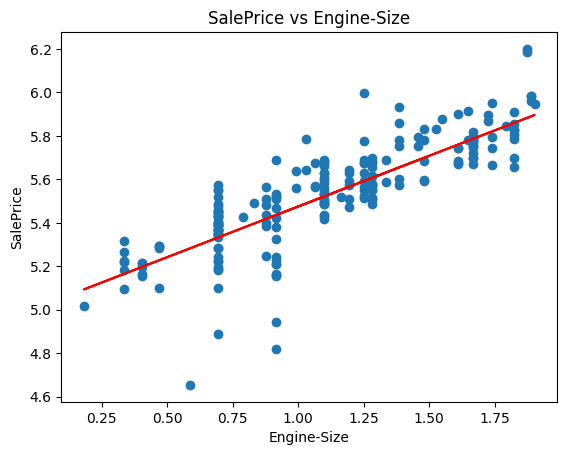

In [53]:
import matplotlib.pyplot as plt
plt.xlabel('Engine-Size')
plt.ylabel('CO2-Emissions')
plt.title('CO2-ER vs Engine-Size')
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_model, 'Red')
plt.show()

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.6873940666038607


In [55]:
# Tutorial 4 (with scaling)

pd.set_option('display.max_rows', None) 
dataset = pd.read_csv(r'C:\Users\mtsil\OneDrive\Documents\fuel.csv')  
dataset.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,NaN,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,NaN,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,NaN,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,NaN,9.5,11.0,258
3,NaN,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,NaN,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


In [56]:
new_df = dataset[['Engine-Size', 'CO2-Emissions']]
new_df.head()

,Engine-Size,CO2-Emissions
0,2.4,199
1,3.5,252
2,3.5,258
3,3.0,210
4,3.5,261


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


standard_scaler = scaler.fit_transform(new_df)


scaler = pd.DataFrame(standard_scaler, columns=new_df.columns)

In [58]:
X = scaler[['Engine-Size']]
y = scaler['CO2-Emissions']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [60]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [61]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  -0.009127083637229291
Coefficient:  [0.83677063]


In [62]:
y_pred_model= model.predict(X_test)

In [63]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
399,1.363168,0.748662
329,0.784122,0.239739
124,-0.830187,-1.096183
678,-1.286405,-0.714491
216,1.099966,1.384815


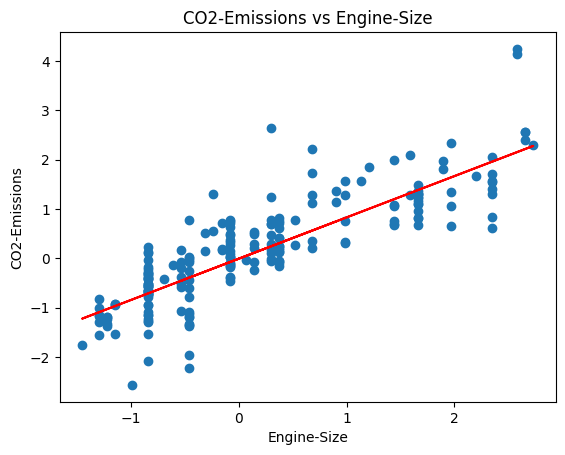

In [64]:
import matplotlib.pyplot as plt
plt.xlabel('Engine-Size')
plt.ylabel('CO2-Emissions')
plt.title('CO2-Emissions vs Engine-Size')
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_model, 'Red')
plt.show()

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.7076855591789908


In [66]:
# Tutorial 5 (with outlier removal)
new_df = dataset[['Engine-Size', 'CO2-Emissions']]
new_df.head()

,Engine-Size,CO2-Emissions
0,2.4,199
1,3.5,252
2,3.5,258
3,3.0,210
4,3.5,261


In [67]:
import scipy.stats as stats
z = np.abs(stats.zscore(new_df))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = new_df[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(99,3)

(99, 3)

In [68]:
X = data_clean[['Engine-Size']]
y = data_clean['CO2-Emissions']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [70]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [71]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  138.73025990773874
Coefficient:  [35.99995821]


In [72]:
y_pred_model= model.predict(X_test)

In [73]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
415,314,329.530038
199,329,329.530038
944,382,379.929980
151,272,268.330109
609,294,318.730051


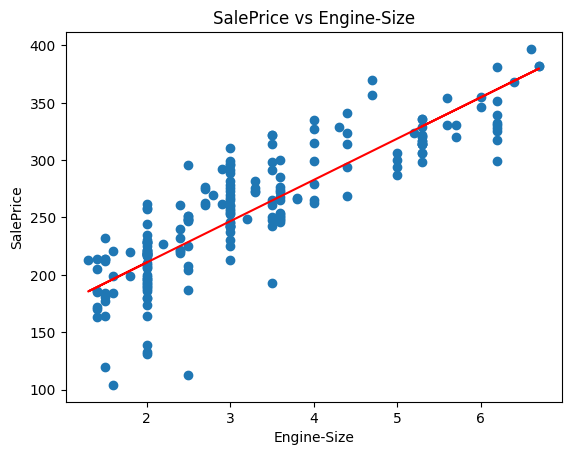

In [74]:
import matplotlib.pyplot as plt
plt.xlabel('Engine-Size')
plt.ylabel('SalePrice')
plt.title('SalePrice vs Engine-Size')
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_model, 'Red')
plt.show()

In [75]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.7322381709668281
